In [ ]:
### Uber Data Analysis
## Rohan Allen

In [1]:
# importing libraries to hold dataset and manipulate dataset, and also to visualise
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [4]:
# to read dataset
data=pd.read_csv('/Users/Rohan/Desktop/Python Programs/Data Science and Analysis/Uber Drives Dataset.csv')
#to display first five rows
data.head()


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
# to check if the dataset has any null values, true means it has
data.isnull()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [6]:
# Specifies which all columns have null values
data.isnull().any()


START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [7]:
# number of null values in each column
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [8]:
# here we drop all null vales, we can also fill it in with random values depending on the situation
data=data.dropna()

In [9]:
# check if any null values left
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [13]:
# to get the type of data in the dataset
data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [14]:
# convert start_date and end_date to datetime(we imported module) objects, so that we can extract the year, month, day, hour, min, etc
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format="%m/%d/%Y %H:%M")
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format="%m/%d/%Y %H:%M")

In [15]:
# extract each of the year, month, day, hour, min and store in seperate arrays
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    #getting day by using calendar module
    weekday.append(calendar.day_name[dayofweek[-1]])
data['HOUR']=hour
data['DAY']=day
data['DAY_OF_WEEK']=dayofweek
data['MONTH']=month
data['WEEKDAY']=weekday

In [16]:
# to check first 5 rows now
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


In [17]:
# no. of categories we have
data['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

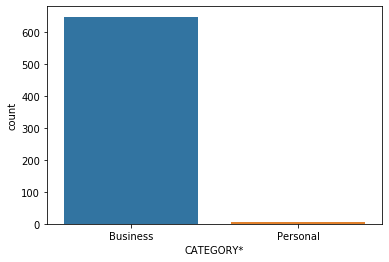

In [18]:
# using seaborn to visualise this data
sns.countplot(x='CATEGORY*',data=data)
#We have large number of business rides caegory as against very few personal rides.

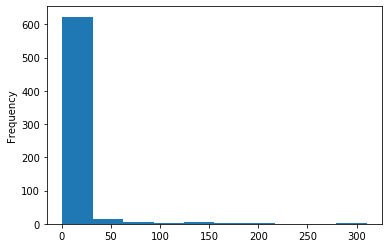

In [19]:
# Plotting how long users travel with uber.
# most ppl travel short distances(0-50) miles with uber
data['MILES*'].plot.hist()

Text(0.5, 1.0, 'Number of trips Vs hours')

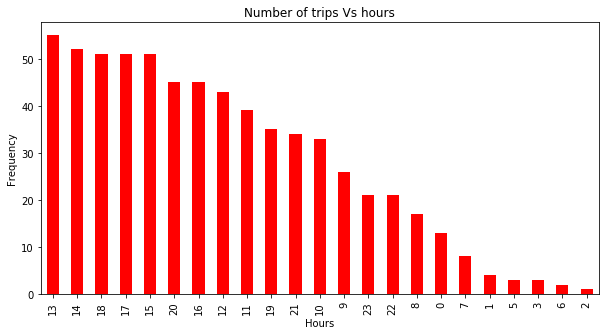

In [25]:
# visualization of at which hour(13->1pm) ppl take uber the most and corresponding frequency.
hours = data['HOUR'].value_counts()
hours.plot(kind='bar',color='red',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips Vs hours')

In [21]:
## most ppl take uber at 1pm, least at 2am.

Text(0.5, 1.0, 'Purpose of Trips and their frequency')

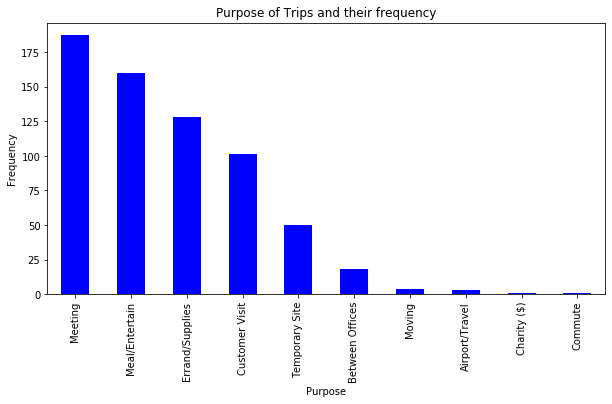

In [23]:
purpose = data['PURPOSE*'].value_counts()
purpose.plot(kind='bar',color='blue',figsize=(10,5))
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.title('Purpose of Trips and their frequency')

In [24]:
### most trips are for meetings and least for commute

Text(0.5, 1.0, 'What Are The Number Of Trips Per Each Day?')

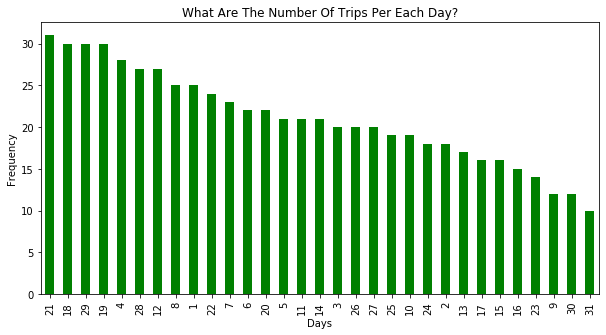

In [27]:
#What Are The Number Of Trips Per Each Day?
day = data['DAY'].value_counts()
day.plot(kind='bar',color='green',figsize=(10,5))
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('What Are The Number Of Trips Per Each Day?')

In [28]:
### 21st of a month has most amount of trips, 30,31st least

Text(0.5, 1.0, 'What Are The Number Of Trips Per Each Day?')

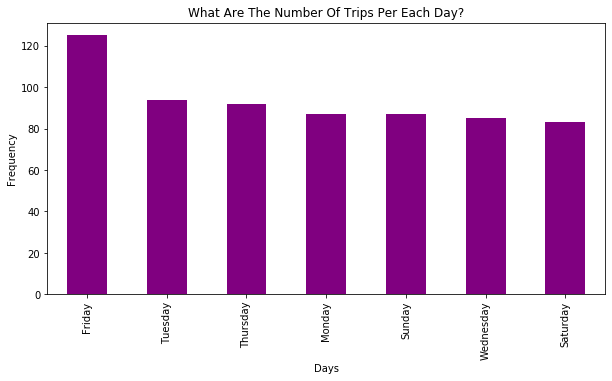

In [30]:
# Which Day Has The Highest Number Of Trips
weekday=data['WEEKDAY'].value_counts()
weekday.plot(kind='bar',color='purple',figsize=(10,5))
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Which Day Has The Highest Number Of Trips')

Text(0.5, 1.0, 'Which Month Has The Highest Number Of Trips')

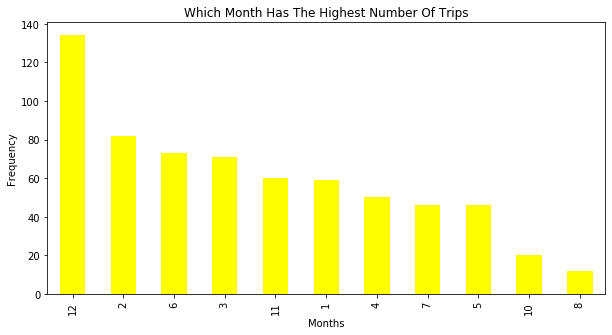

In [31]:
# Which month Has The Highest Number Of Trips
month=data['MONTH'].value_counts()
month.plot(kind='bar',color='yellow',figsize=(10,5))
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title('Which Month Has The Highest Number Of Trips')

In [32]:
### december has hifhest, august lowest

Text(0.5, 1.0, 'where do people start their trips from')

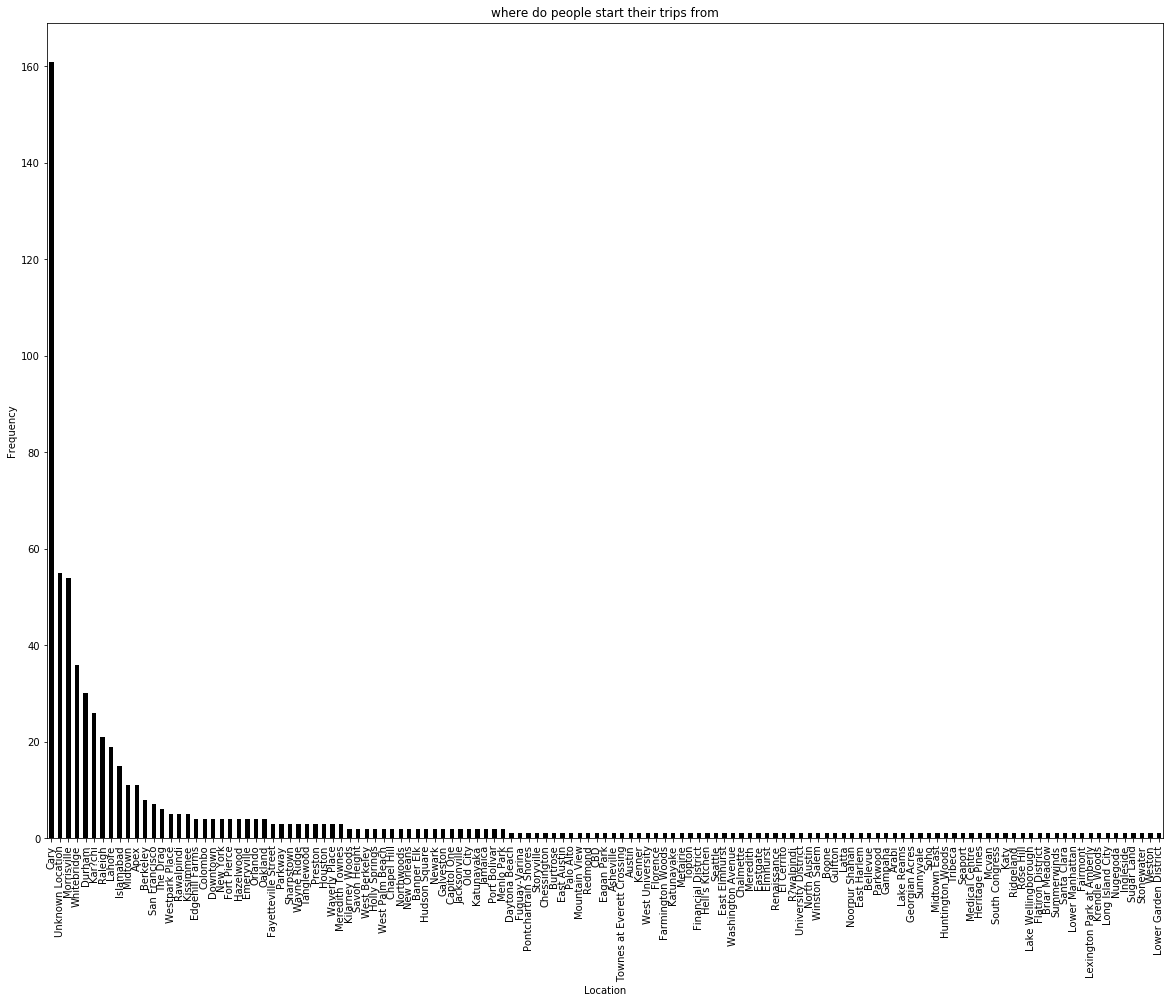

In [33]:
# where do people start their trips from
start=data['START*'].value_counts()
start.plot(kind='bar',color='black',figsize=(20,15))
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.title('where do people start their trips from')

In [ ]:
### we can use all these data and insights to improve the buisness of the company and to market, target and offer discounts to customers more effictively.